# Tornado Project - Historical vs. Recent Intensity

### Historical Intensity

Next, I wanted to look at how intensity has changed over the years and if more intense tornadoes are occurring outside of Tornado Alley. First, I created some visualizations of historic tornado intensity data. Intense tornadoes are considered EF4 or EF5 on the Enhanced Fujita scale.

In [1]:
# importing our packages
import pandas as pd
import matplotlib.pyplot as plt

# loading the data from historical intensity tables into DataFrames
historical_data_inside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Historical_Intense_Tornadoes_Inside.xlsx")
historical_data_outside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Historical_Intense_Tornadoes_Outside.xlsx")


In [2]:
# grouping the data by year and calculate the average intense tornado count
avg_inside_by_year = historical_data_inside.groupby('Year')['Intense_Tornado_Count'].mean()
avg_outside_by_year = historical_data_outside.groupby('Year')['Intense_Tornado_Count'].mean()


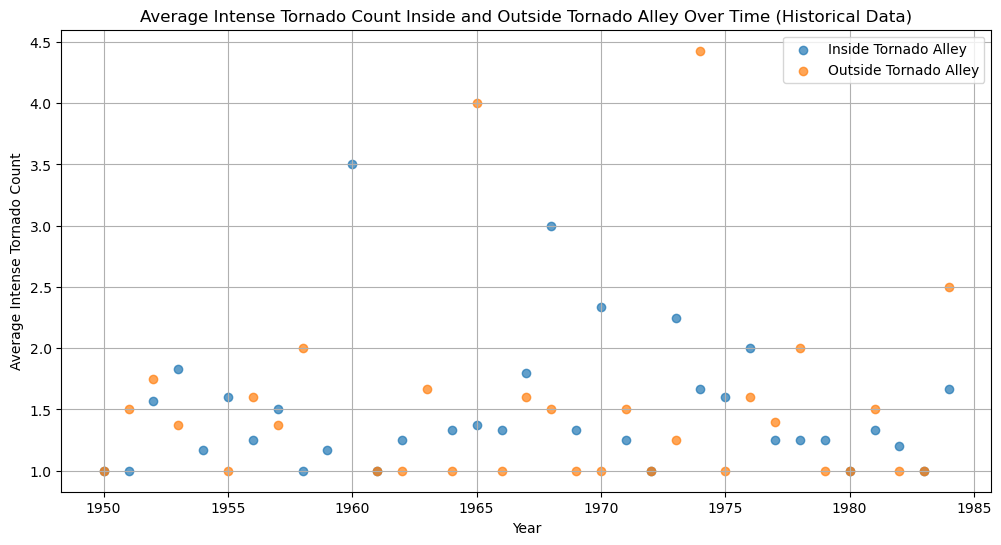

In [3]:
# creating a scatter plot to visualize the average intense tornado counts over the years
plt.figure(figsize=(12, 6))

plt.scatter(avg_inside_by_year.index, avg_inside_by_year, label='Inside Tornado Alley', alpha = 0.7)
plt.scatter(avg_outside_by_year.index, avg_outside_by_year, label='Outside Tornado Alley', alpha = 0.7)

# customizing the plot
plt.title('Average Intense Tornado Count Inside and Outside Tornado Alley Over Time (Historical Data)')
plt.xlabel('Year')
plt.ylabel('Average Intense Tornado Count')
plt.legend()
plt.grid()

# showing the plot
plt.show()

This visualization shows the average number of tornadoes either inside or outside Tornado Alley Historically. Next, I created another visualization to compare the historical data to more recent data on tornado intensity.

### Recent Occurrences

In [4]:
# loading in the data from historical occurrence tables into DataFrames
recent_data_inside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Recent_Intense_Tornadoes_Inside.xlsx")
recent_data_outside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Recent_Intense_Tornadoes_Outside.xlsx")


In [5]:
# grouping the data by year and calculate the average intense tornado count
avg_inside_by_year = recent_data_inside.groupby('Year')['Intense_Tornado_Count'].mean()
avg_outside_by_year = recent_data_outside.groupby('Year')['Intense_Tornado_Count'].mean()


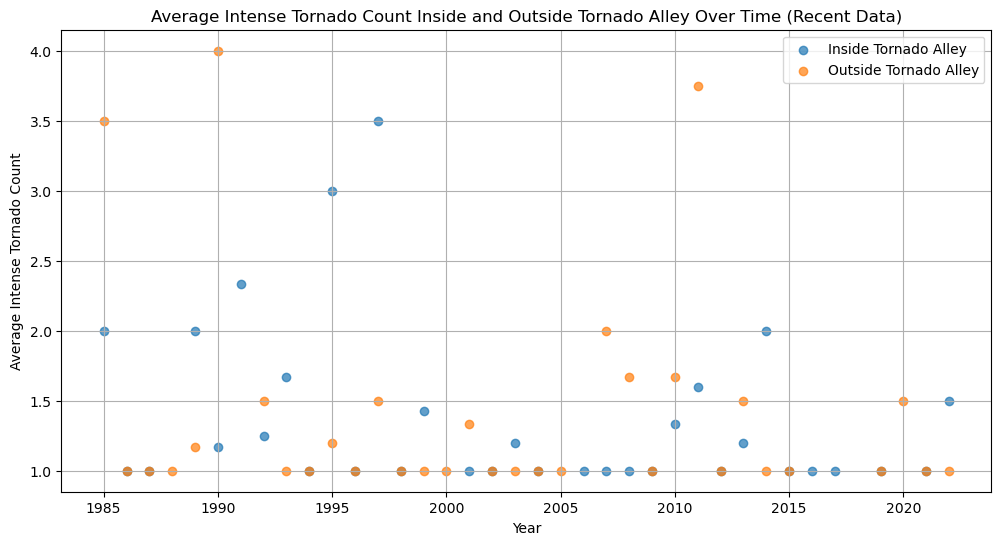

In [6]:
# creating a scatter plot to visualize the average intense tornado counts over the years
plt.figure(figsize=(12, 6))

plt.scatter(avg_inside_by_year.index, avg_inside_by_year, label='Inside Tornado Alley', alpha = 0.7)
plt.scatter(avg_outside_by_year.index, avg_outside_by_year, label='Outside Tornado Alley', alpha = 0.7)

# customizing the plot
plt.title('Average Intense Tornado Count Inside and Outside Tornado Alley Over Time (Recent Data)')
plt.xlabel('Year')
plt.ylabel('Average Intense Tornado Count')
plt.legend()
plt.grid()

# showing the plot
plt.show()

After visualizing historical and recent tornado data, it seems that the number of intense tornadoes may have decreased, so I used ANOVA testing to see if there were any significant changes between historical and recent data. 

### Analysis

In [7]:
# importing package for ANOVA test
from scipy.stats import f_oneway

# performing ANOVA tests to compare historical and recent data for inside Tornado Alley
f_statistic_inside, p_value_inside = f_oneway(
    historical_data_inside['Intense_Tornado_Count'],
    recent_data_inside['Intense_Tornado_Count']
)

# performing ANOVA tests to compare historical and recent data for outside Tornado Alley
f_statistic_outside, p_value_outside = f_oneway(
    historical_data_outside['Intense_Tornado_Count'],
    recent_data_outside['Intense_Tornado_Count']
)

# printing the results for inside Tornado Alley
print("Inside Tornado Alley:")
print("F-statistic:", f_statistic_inside)
print("P-value:", p_value_inside)

# determining if the differences are statistically significant
alpha = 0.05
if p_value_inside < alpha:
    print("There is a statistically significant difference between historical and recent data inside Tornado Alley.")
else:
    print("There is no statistically significant difference between historical and recent data inside Tornado Alley.")

# printing the results for outside Tornado Alley
print("\nOutside Tornado Alley:")
print("F-statistic:", f_statistic_outside)
print("P-value:", p_value_outside)

# determining if the differences are statistically significant
if p_value_outside < alpha:
    print("There is a statistically significant difference between historical and recent data outside Tornado Alley.")
else:
    print("There is no statistically significant difference between historical and recent data outside Tornado Alley.")

Inside Tornado Alley:
F-statistic: 0.6945926312645734
P-value: 0.40546016718311595
There is no statistically significant difference between historical and recent data inside Tornado Alley.

Outside Tornado Alley:
F-statistic: 2.2736200755316647
P-value: 0.1332358681439771
There is no statistically significant difference between historical and recent data outside Tornado Alley.


ANOVA test results signified there were no significant differences in the amount of intense tornadoes over time, which suggests tornadoes are not becoming more intense over time. 